# CREDIT SCORE CLASSIFICATION

## Overview
In this project, we will develop a credit scoring model using historical banking data. <br> Our goal is to predict customers' creditworthiness based on various features such as income, debt, and credit history. We will follow these steps:
1. **Data Exploration:** Understand the dataset and check for missing values
2. **Data Preprocessing:** Clean and prepare the data for modeling.
3. **Outlier Detection and Handling:** Identify and cap outliers.
4. **Visualization:** Creating visuals to learn more about the dataset
5. **Feature Engineering and Selection:** Select features for the model.
6. **Handling Imbalanced Data:** Use techniques like SMOTE to balance the classes.
7. **Model Building and Evaluation:** Training various models and evaluating their performance.
8. **Deploying the Model:** Applying the model to new data and generate predictions.

## Data Exploration
In this section, we load the data and perform initial explorations to understand its structure and identify ppotential issues

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# importing the historical banking data as a pandas dataframe
bank_data = pd.read_csv("train.csv", low_memory=False)

# creating a copy of the data for the manipulation
df = bank_data.copy()

# displaying the first few rows of the dataframe
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [2]:
# displaying the shape of the dataframe
print(f"The number of rows are {df.shape[0]} and the number of columns are {df.shape[1]}")

The number of rows are 100000 and the number of columns are 28


In [3]:
# showing the data types and number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
# converting the column names to lowercase for consistency
df.columns = df.columns.str.lower()

In [5]:
# finding the statistical values of the numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
monthly_inhand_salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
num_bank_accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
num_credit_card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
interest_rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
num_credit_inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
credit_utilization_ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
total_emi_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [6]:
# finding the statistical values of the categorical columns
df.describe(exclude=np.number).transpose()

,count,unique,top,freq
id,100000,100000,0x1602,1
customer_id,100000,12500,CUS_0xd40,8
month,100000,8,January,12500
name,90015,10139,Langep,44
age,100000,1788,38,2833
ssn,100000,12501,#F%$D@*&8,5572
occupation,100000,16,_______,7062
annual_income,100000,18940,36585.12,16
num_of_loan,100000,434,3,14386
type_of_loan,88592,6260,Not Specified,1408


## Data Preprocessing
Here we defined a function for data preprocessing that handles tasks like removing unwanted characters, replacing values, imputing missing values, and changing data types. This function is applied to several columns

In [7]:
# defining a function for preprocessing 
def preprocess_data(data, mvi_groupby=None, mvi_customval=None, column=None, unwanted_value_replace=None, unwanted_value_strip=None, datatype=None):
    # strip unwanted characters from the beginning or end of values
    if unwanted_value_strip is not None:
        if data[column].dtype == object:
            data[column] = data[column].str.strip(unwanted_value_strip)
            print(f"\nTrailing & leading {unwanted_value_strip} are removed")
    
    # replace unwanted values with NaN
    if unwanted_value_replace is not None:
        data[column] = data[column].replace(unwanted_value_replace, np.nan)
        print(f"\nUnwanted value {unwanted_value_replace} is replaced with NaN")
    
    # impute missing values with mode within groups
    if mvi_groupby and column:
        data[column] = data[column].replace('', np.nan)
        group_mode = data.groupby(mvi_groupby)[column].transform(lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)
        data[column] = data[column].fillna(group_mode)
        print("\nMissing values imputed with group mode")
    
    # impute missing values with a custom value
    if mvi_customval is not None:
        data[column].replace(np.NaN, mvi_customval, inplace=True)
        print(f"\nMissing values are replaced with '{mvi_customval}'")
    
    # change the data type of the column
    if datatype is not None:
        data[column] = data[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")
print('----------------------------------------------------------------------------------')

----------------------------------------------------------------------------------


In [8]:
# creating a function that evaluated the preprocess function on all columns
def process_columns(df, column_settings):
    for settings in column_settings:
        print(f"Column: {settings['column']}")
        preprocess_data(
            data=df, 
            column=settings['column'], 
            mvi_groupby=settings.get('mvi_groupby', 'customer_id'), 
            unwanted_value_strip=settings.get('unwanted_value_strip', None), 
            unwanted_value_replace=settings.get('unwanted_value_replace', None), 
            mvi_customval=settings.get('mvi_customval', None), 
            datatype=settings.get('datatype', None)
        )
        print('----------------------------------------------------------------------------------')

column_settings = [
    {'column': 'name'},
    {'column': 'type_of_loan', 'mvi_customval': 'not specified'},
    {'column': 'ssn', 'unwanted_value_replace': '#F%$D@*&8'},
    {'column': 'occupation', 'unwanted_value_replace': '_______'},
    {'column': 'credit_mix', 'unwanted_value_replace': '_'},
    {'column': 'payment_behaviour', 'unwanted_value_replace': '!@9#%8'},
    {'column': 'monthly_inhand_salary'},
    {'column': 'num_credit_inquiries'},
    {'column': 'age', 'unwanted_value_strip': '_', 'datatype': 'int'},
    {'column': 'annual_income', 'unwanted_value_strip': '_', 'datatype': 'float'},
    {'column': 'outstanding_debt', 'unwanted_value_strip': '_', 'datatype': 'float'},
    {'column': 'amount_invested_monthly', 'unwanted_value_strip': '_', 'datatype': 'float'},
    {'column': 'num_of_loan', 'unwanted_value_strip': '_', 'datatype': 'int'},
    {'column': 'num_of_delayed_payment', 'unwanted_value_strip': '_', 'datatype': 'float'},
    {'column': 'changed_credit_limit', 'unwanted_value_strip': '_', 'unwanted_value_replace': '_', 'datatype': 'float'},
    {'column': 'monthly_balance', 'unwanted_value_strip': '_', 'unwanted_value_replace': '__-333333333333333333333333333__', 'datatype': 'float'}
]

process_columns(df, column_settings)

Column: name

Missing values imputed with group mode
----------------------------------------------------------------------------------
Column: type_of_loan

Missing values imputed with group mode

Missing values are replaced with 'not specified'
----------------------------------------------------------------------------------
Column: ssn

Unwanted value #F%$D@*&8 is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------------------------------------
Column: occupation

Unwanted value _______ is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------------------------------------
Column: credit_mix

Unwanted value _ is replaced with NaN

Missing values imputed with group mode
----------------------------------------------------------------------------------
Column: payment_behaviour

Unwanted value !@9#%8 is replaced with NaN

Missing values imputed with group mode
----------

In [9]:
# creating a function that picks the year and month and then combines them to give total number of months
def credit_hist_in_months(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return(years*12)+month
    else:
        return val

# applying the function to the column 
df['credit_history_age'] = df['credit_history_age'].apply(lambda x: credit_hist_in_months(x)).astype(float)

# applying the preprocess function on the month column
print('Column: credit_history_age')
preprocess_data(data=df, column = 'credit_history_age', mvi_groupby = 'customer_id')

Column: credit_history_age

Missing values imputed with group mode


In [10]:
# checking to see if there are any missing values left
df.isna().sum()

id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64

In [11]:
# checking the datatypes to see if they are as expected
df.dtypes

id                           object
customer_id                  object
month                        object
name                         object
age                           int32
ssn                          object
occupation                   object
annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   int32
type_of_loan                 object
delay_from_due_date           int64
num_of_delayed_payment      float64
changed_credit_limit        float64
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age          float64
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                

## Outlier Capping
Here, we implement a function to detect and cap outliers using the Inter-Quartile Range (IQR) method. We then visualize the effect of outlier capping on the data

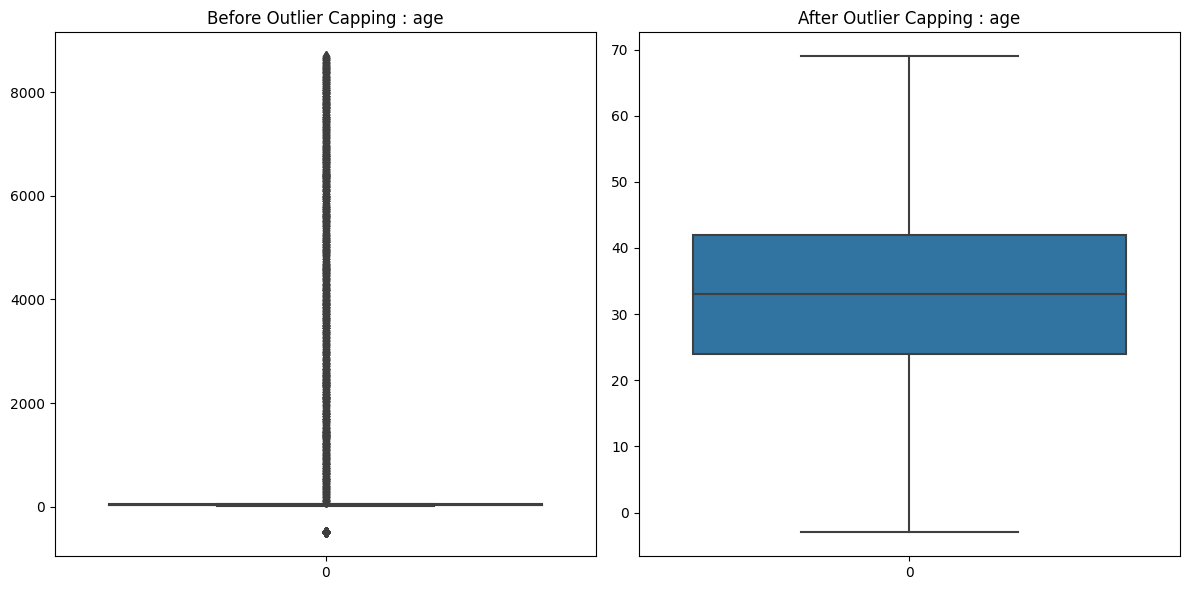

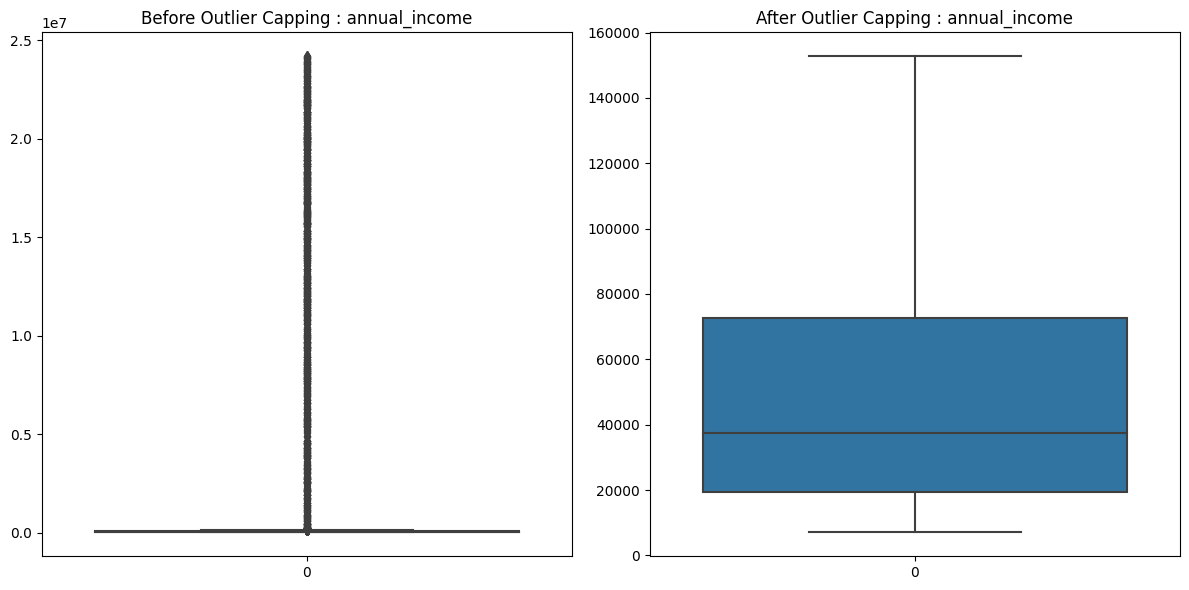

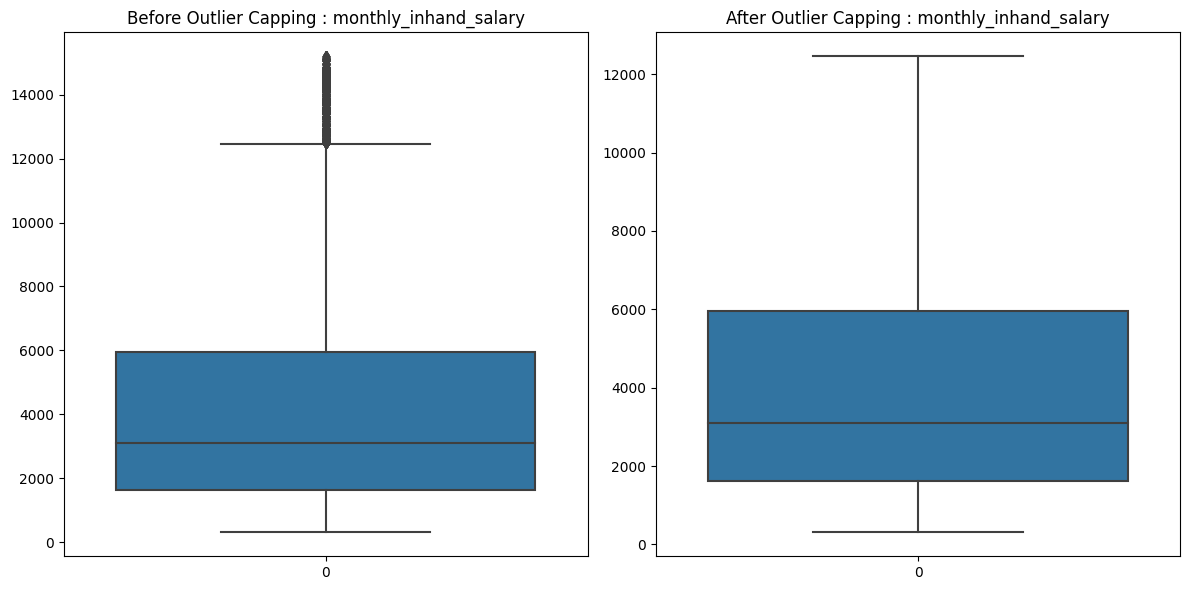

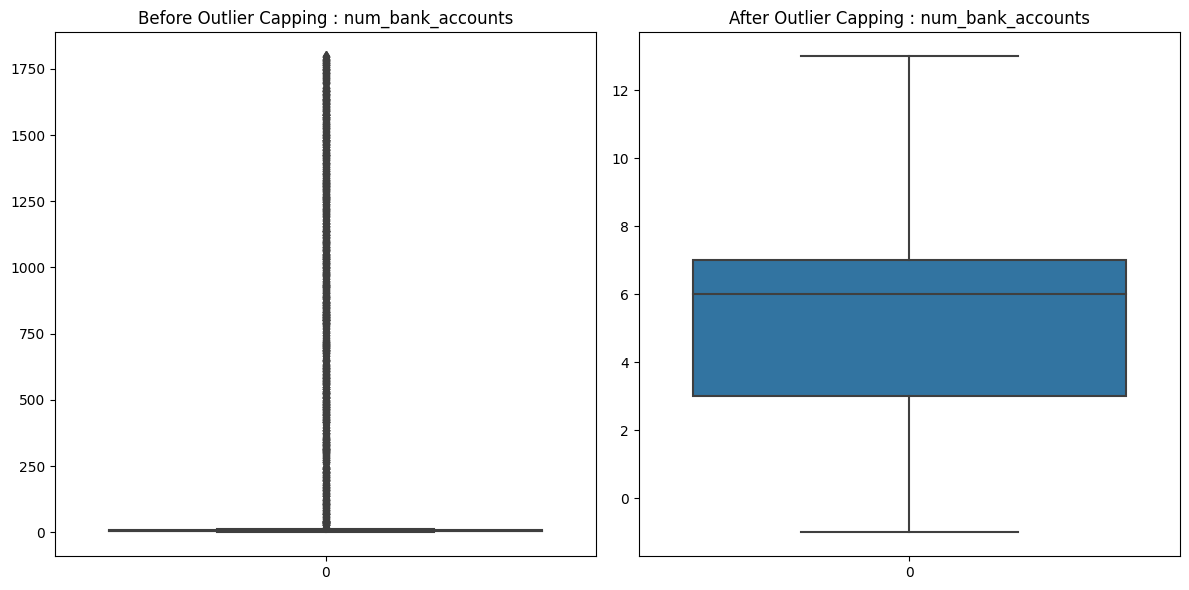

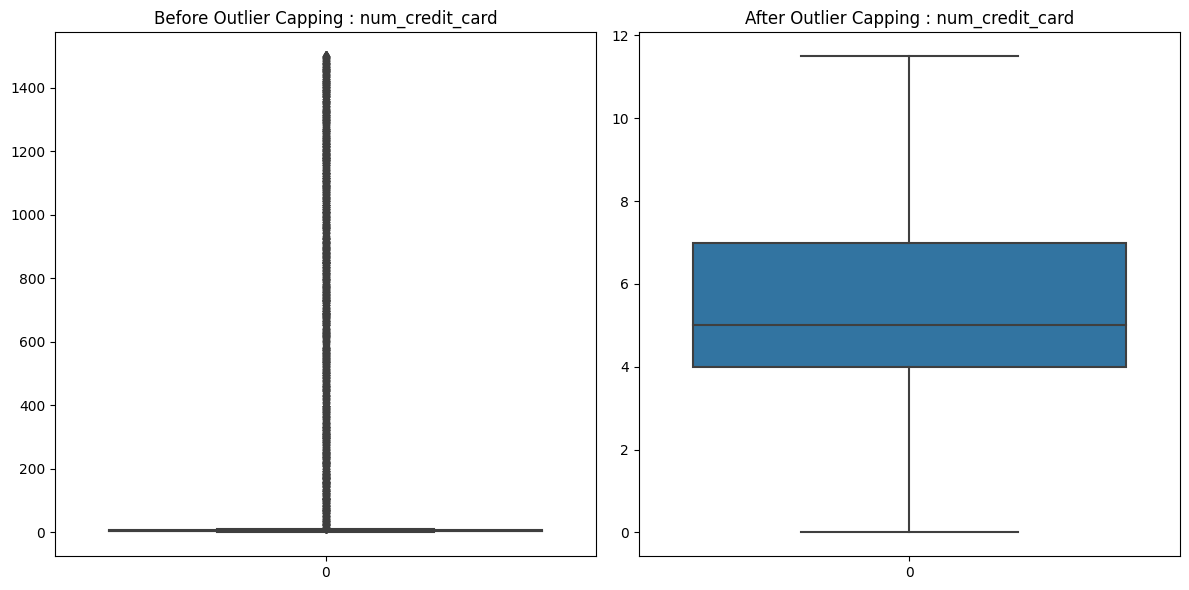

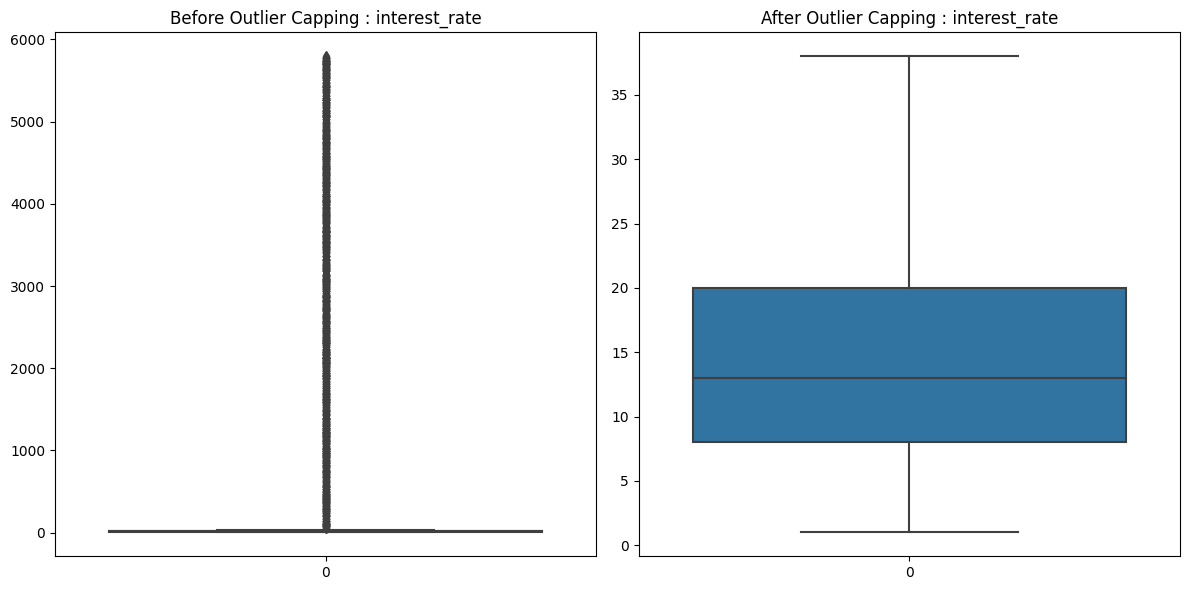

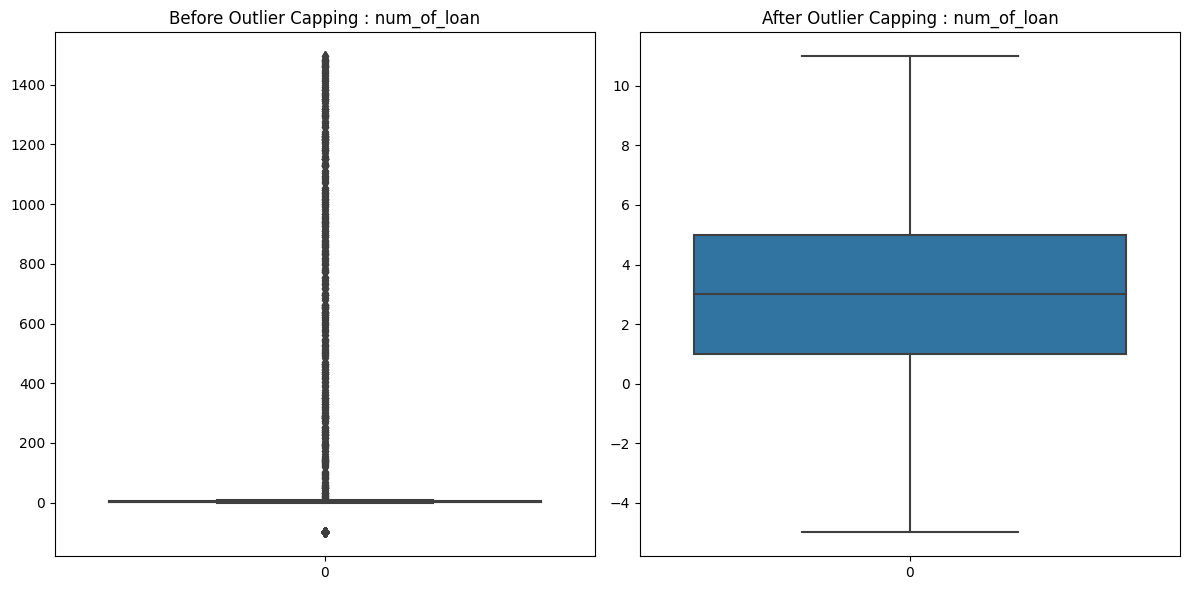

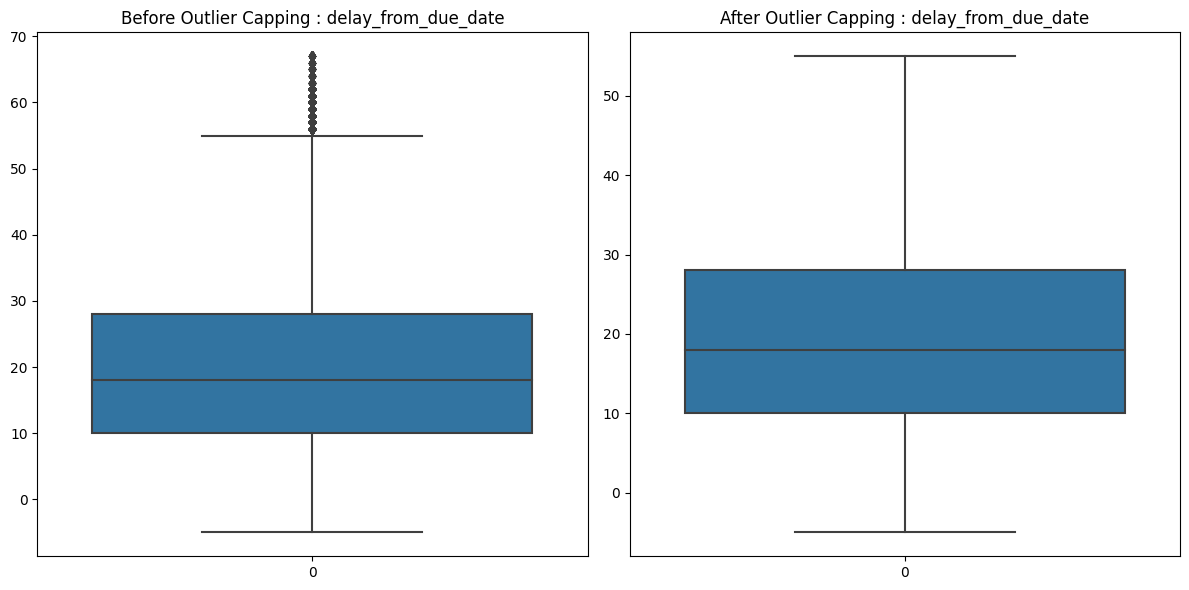

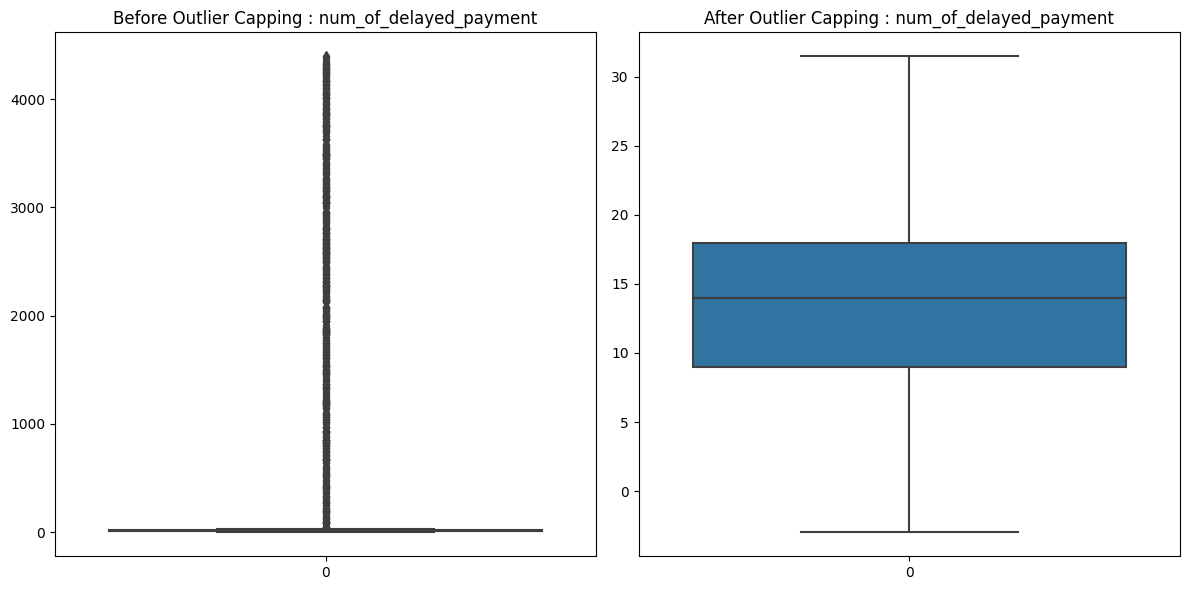

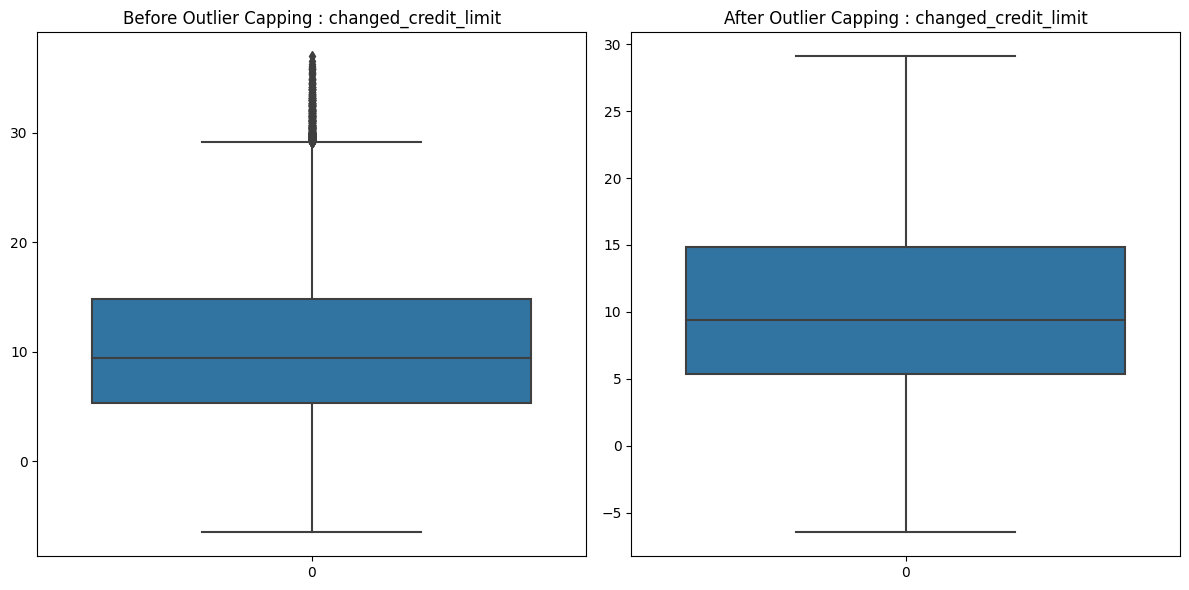

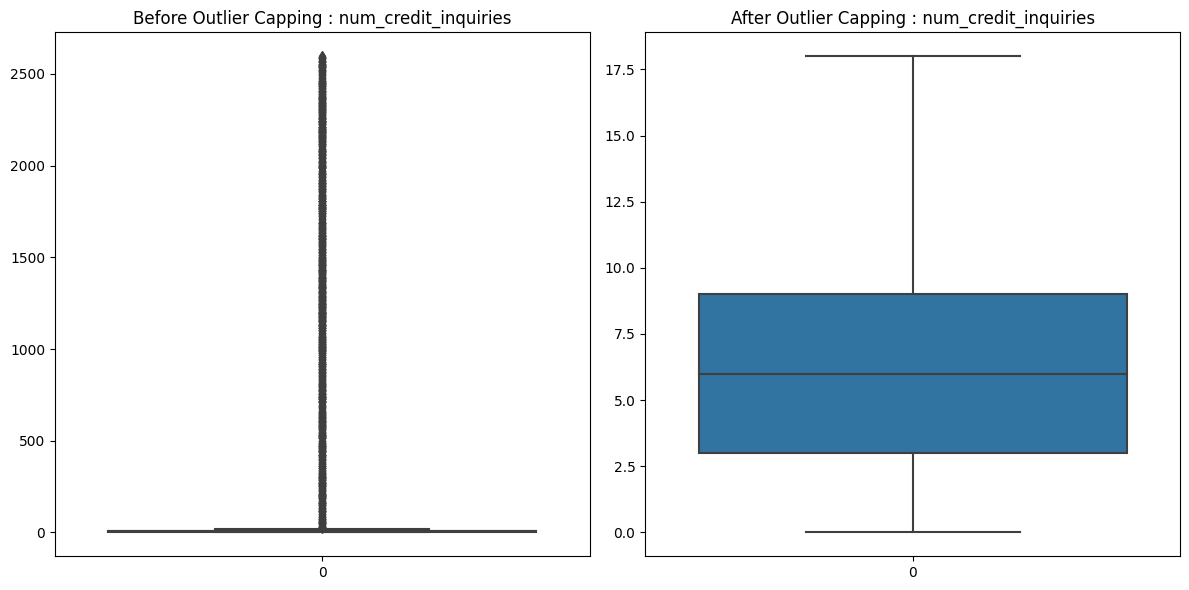

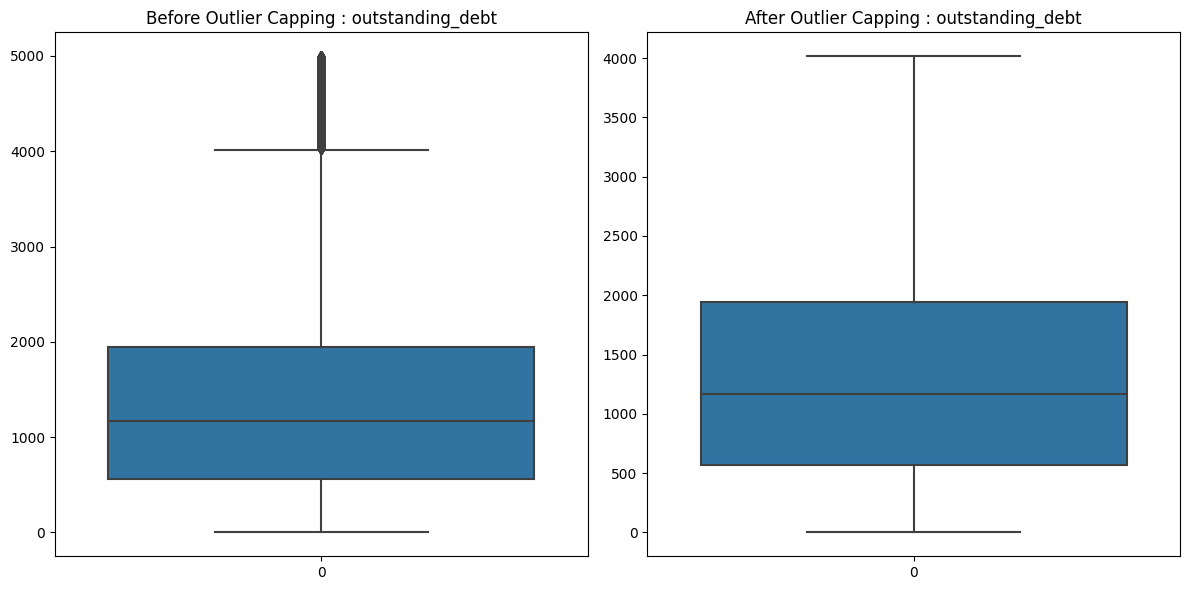

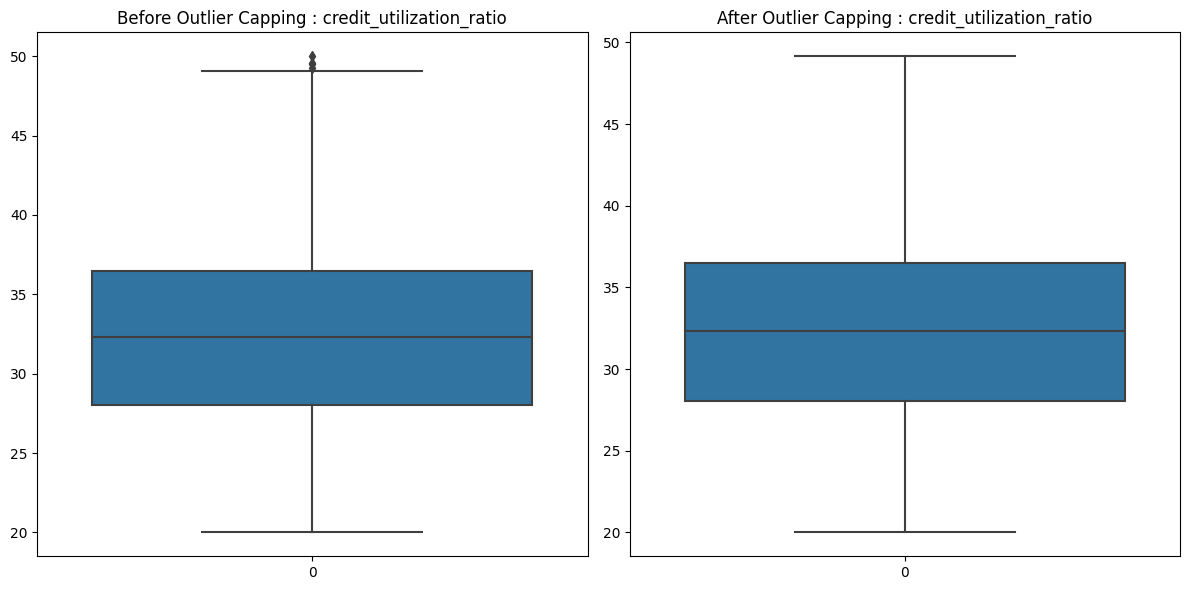

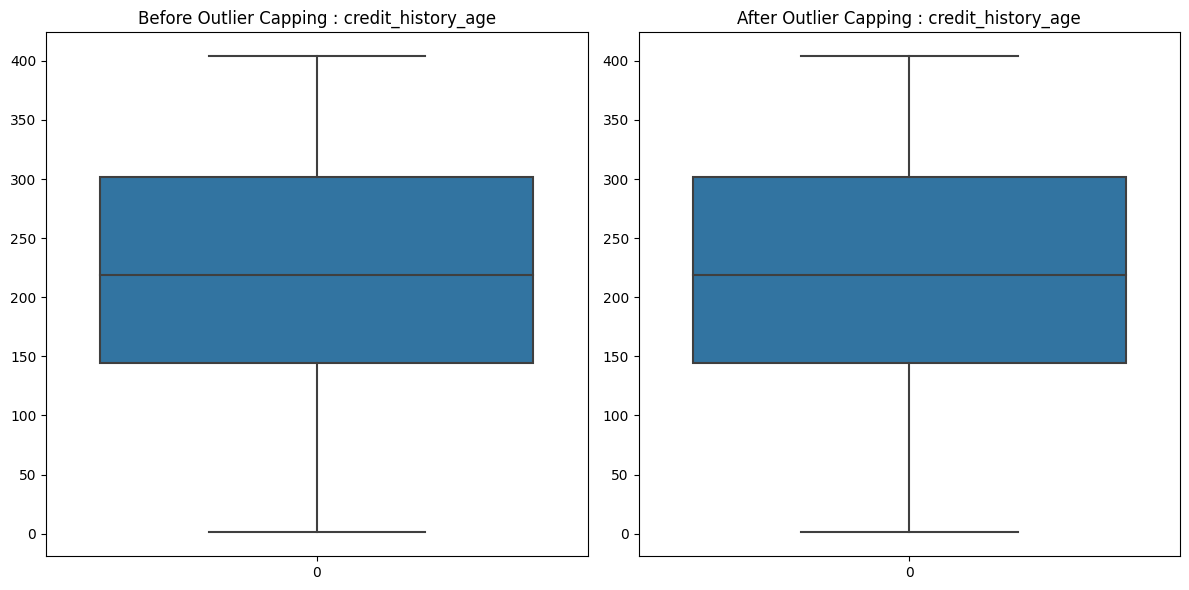

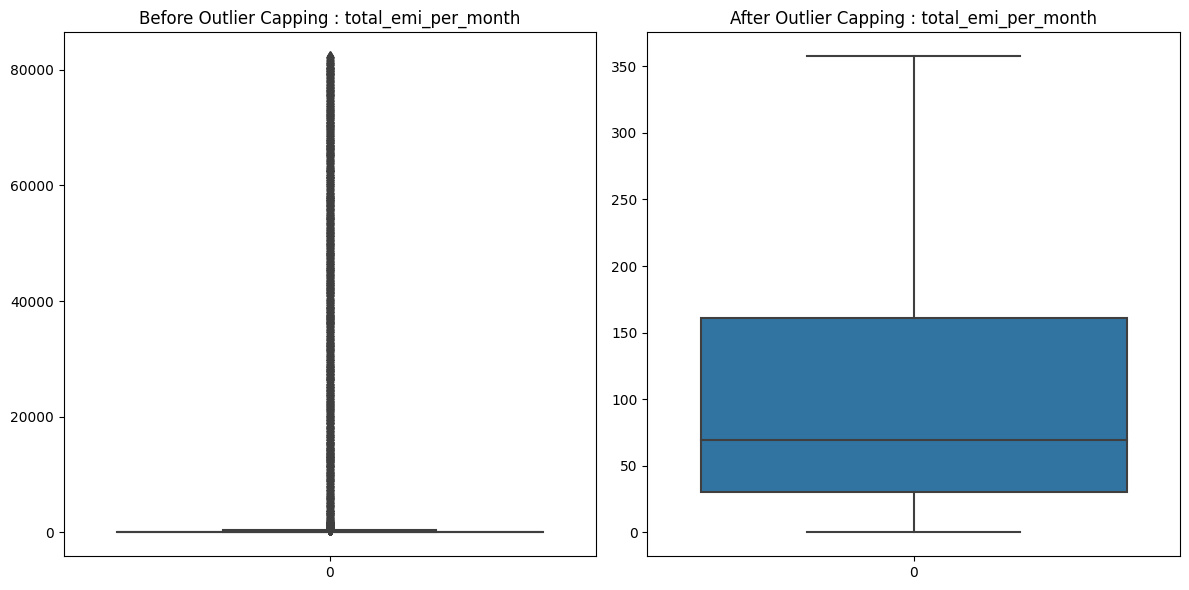

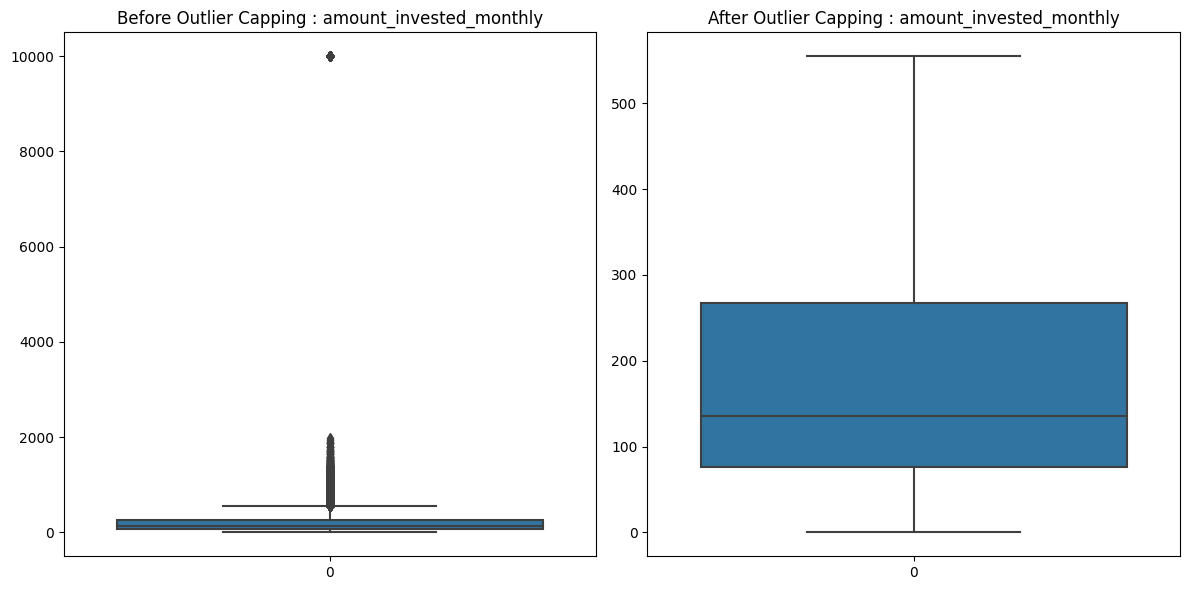

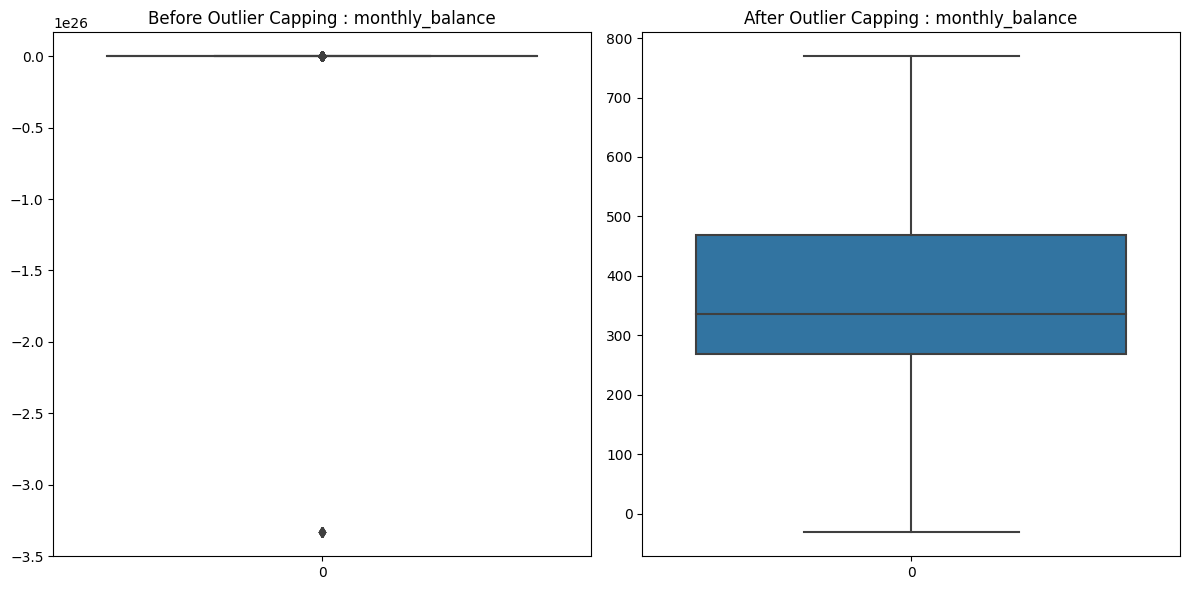

In [12]:
# function to cap outliers using the Inter-Quartile Range (IQR) Method
def outlier_capping(data, threshold=1.5):
    data_copy = data.copy()
    outlier_indices = []
    for column in data_copy.columns:
        if pd.api.types.is_numeric_dtype(data_copy[column]):
            Q1 = data_copy[column].quantile(0.25)
            Q3 = data_copy[column].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - threshold * IQR
            upper = Q3 + threshold * IQR
            outliers = data_copy[(data_copy[column] < lower) | (data_copy[column] > upper)]
            outlier_indices.extend(outliers.index)
            data_copy[column] = np.where(data_copy[column] < lower, lower, data_copy[column])
            data_copy[column] = np.where(data_copy[column] > upper, upper, data_copy[column])
    outlier_indices = list(set(outlier_indices))
    return data_copy, outlier_indices
    
# applying the outlier capping to the dataset
df_clean, outliers = outlier_capping(df)


# visualizing the effect of outlier capping
def outlier_cap_compare(data, data_processed, outlier_indices):
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            plt.figure(figsize=(12,6))
            plt.subplot(1,2,1)
            sns.boxplot(data=data[column])
            plt.title(f'Before Outlier Capping : {column}')
            plt.subplot(1,2,2)
            sns.boxplot(data=data_processed[column])
            plt.title(f'After Outlier Capping : {column}')
            plt.tight_layout()
            plt.show()
            
outlier_cap_compare(data = df, data_processed = df_clean, outlier_indices = outliers)

In [13]:
print(f"Number of rows affected by outlier capping: {len(outliers)}")

Number of rows affected by outlier capping: 41311


## Visualization
Here, we plot various visuals to further understand our data. From heatmap to check multicollinearity to pie chart to check the balance of the target variable

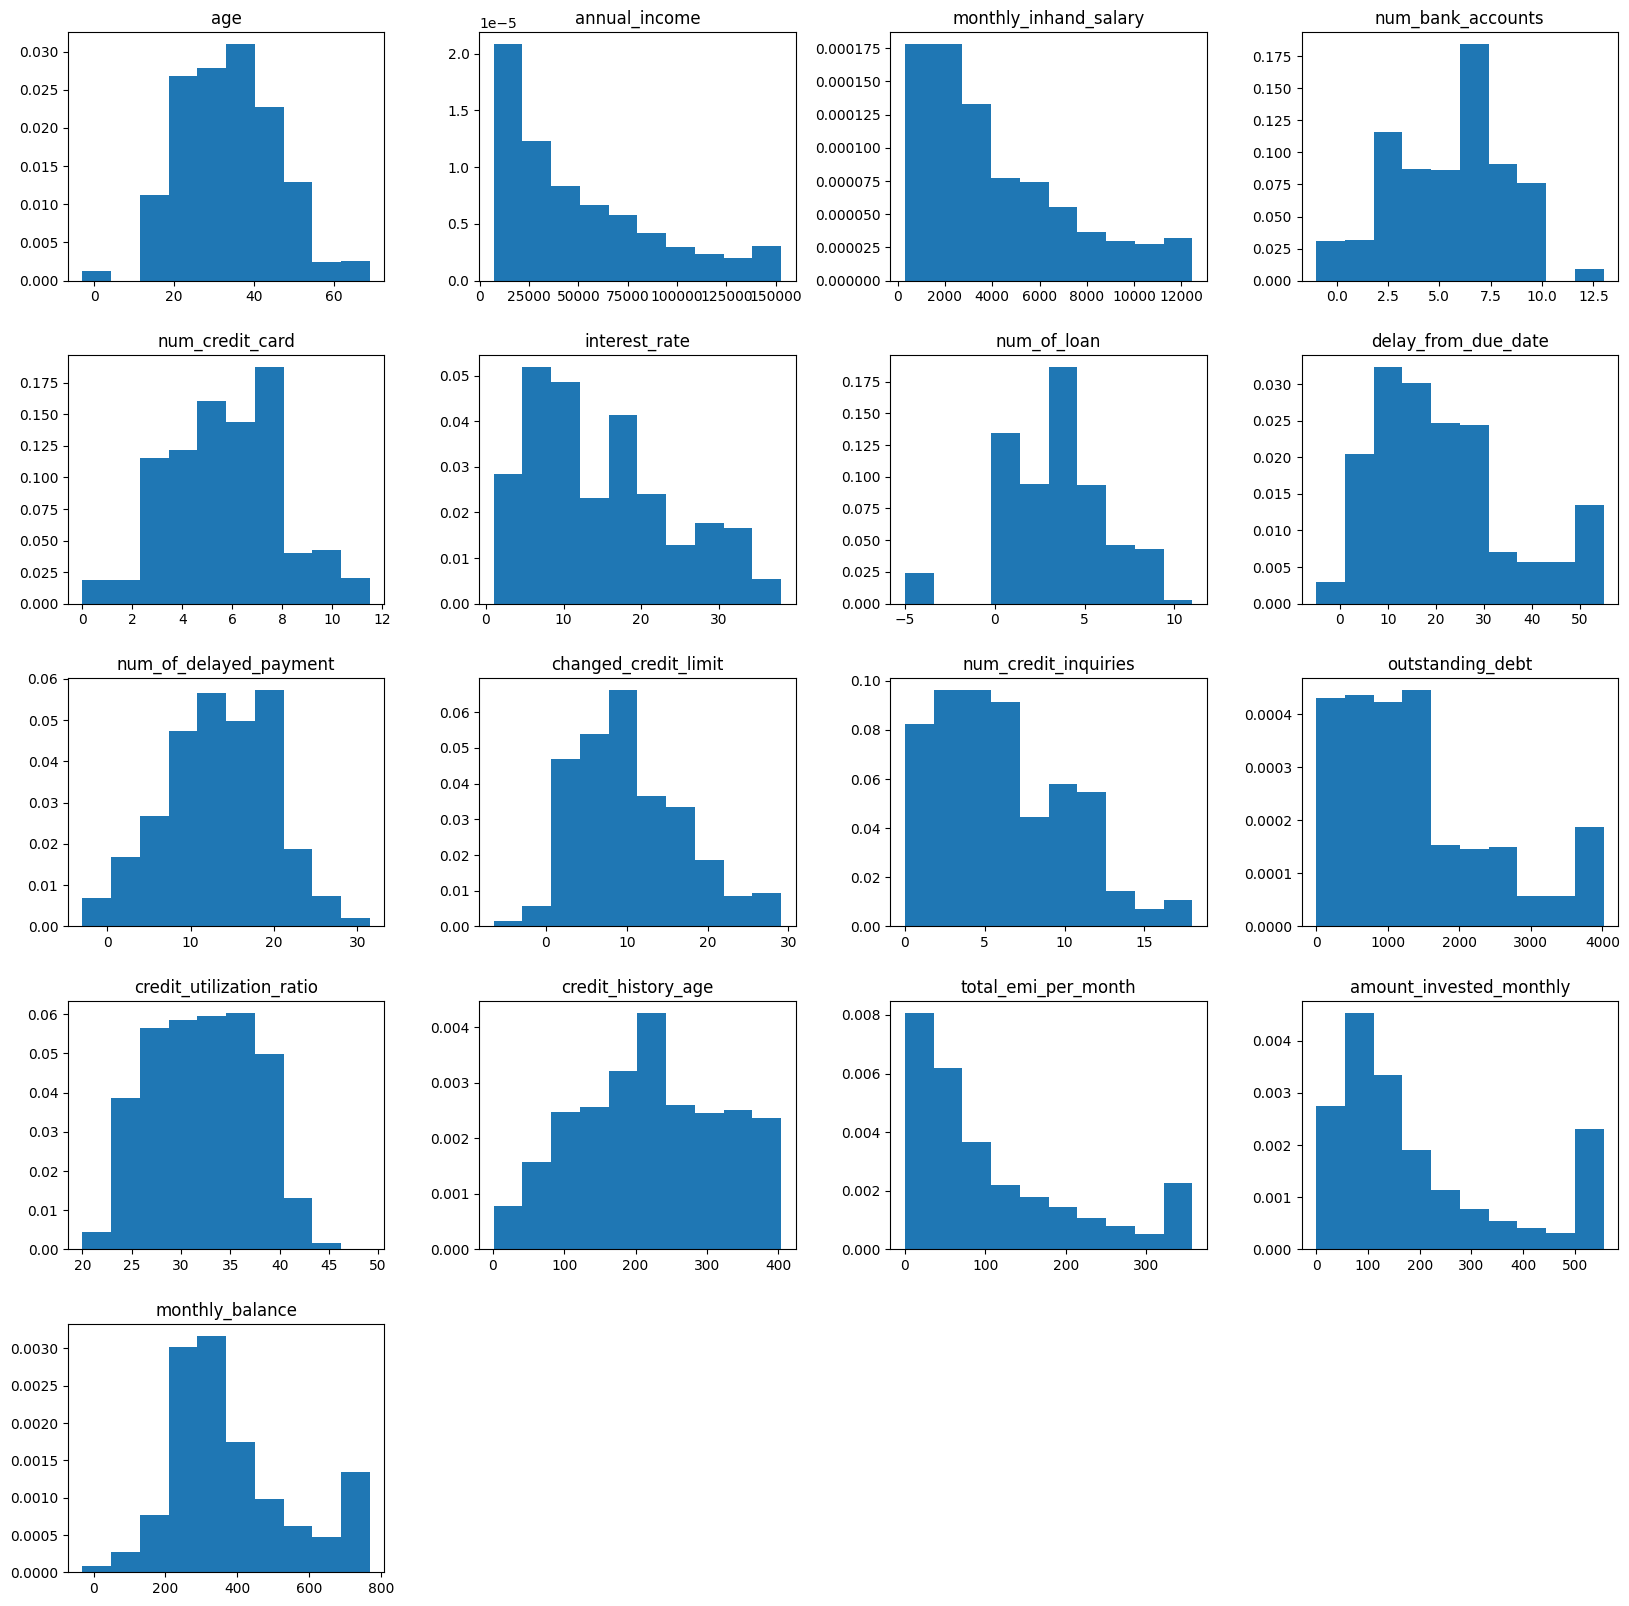

In [14]:
# creating a histogram for the numerical columns 
df_clean.hist(figsize=(20,20), grid=False, density=True)
plt.show()

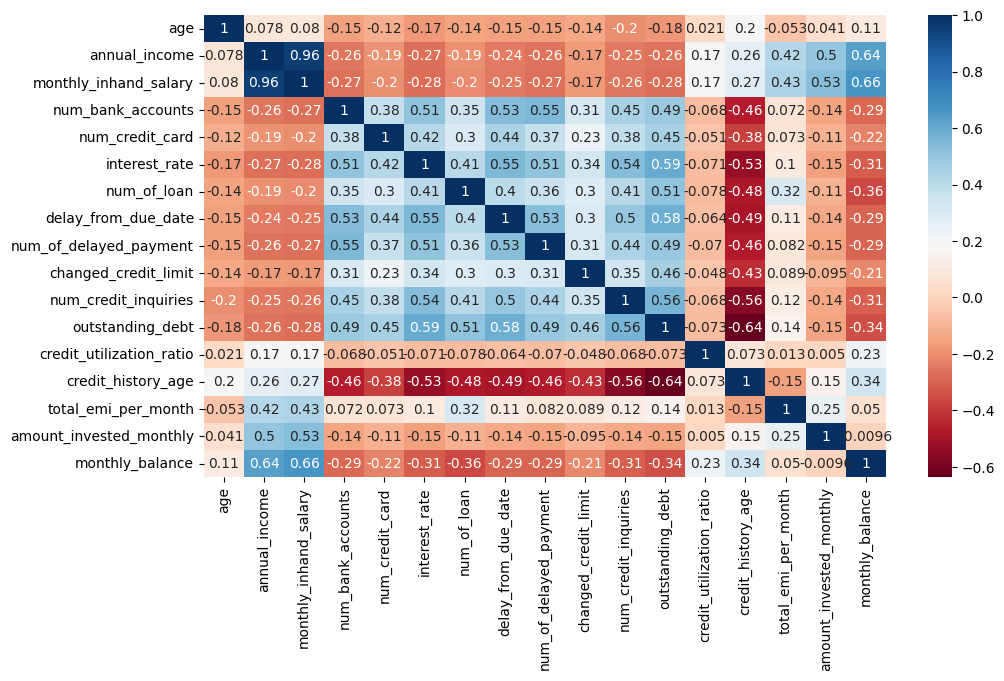

In [15]:
# selecting only numeric columns
numeric_df_clean = df_clean.select_dtypes(include=[np.number])

# correlation matrix to check the level of multicollinearity in the data
plt.figure(figsize=(11,6))
corr_matrix = numeric_df_clean.corr()
sns.heatmap(corr_matrix, cmap="RdBu", annot=True)
plt.show()

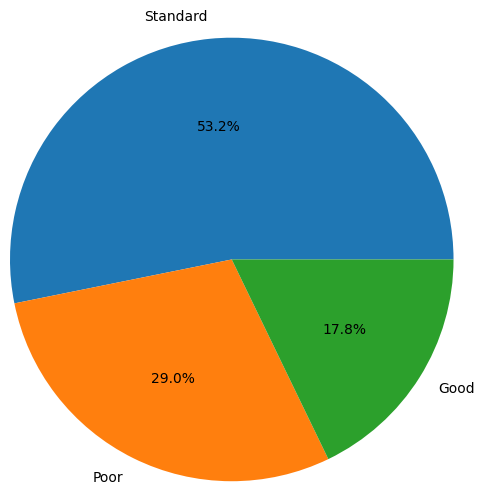

In [16]:
# checking to see if the data is balanced
credit_score_vals = df_clean.credit_score.value_counts().index
credit_score_labels = df_clean.credit_score.value_counts().values

plt.pie(data = df_clean, x = credit_score_labels, labels = credit_score_vals,
        autopct = '%1.1f%%', radius = 1.5)
plt.show()

The data is imbalanced

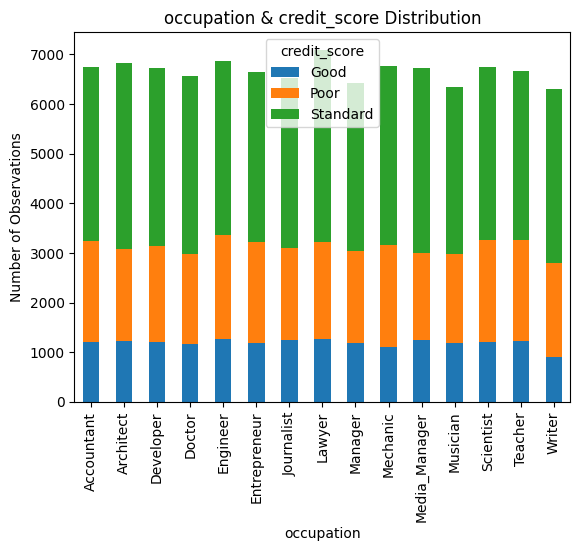

In [17]:
# function to plot a bar chart between categorical variables and its relationship with the target variable
def stacked_bar(data, cat_col1, cat_col2, rotation_val=0):
    pd.crosstab(data[cat_col1], data[cat_col2]).plot(kind='bar', stacked=True)
    plt.title(f'{cat_col1} & {cat_col2} Distribution')
    plt.xlabel(f'{cat_col1}')
    plt.ylabel('Number of Observations')
    plt.xticks(rotation = rotation_val)
    plt.show()
# plotting a bar char between occupation and credit score
stacked_bar(data = df_clean, cat_col1 = 'occupation', cat_col2 = 'credit_score', rotation_val = 90)

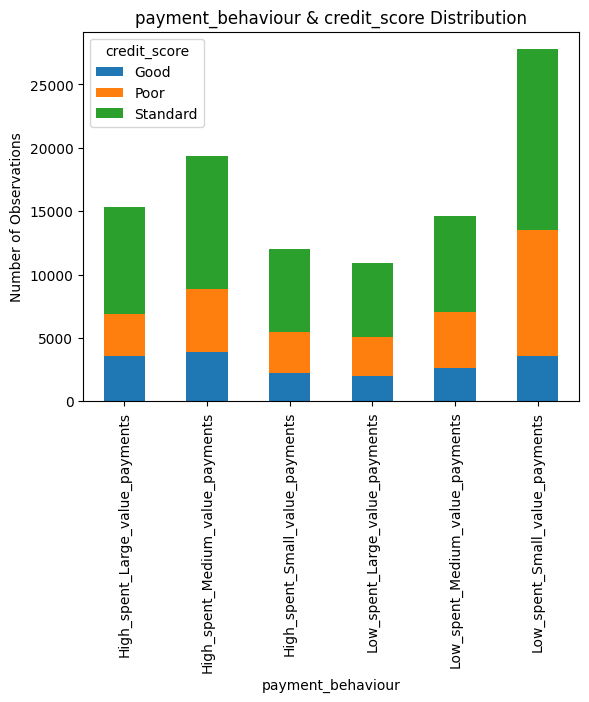

In [18]:
# visual to understand the relationship between payment behaviour and the credit score
stacked_bar(data = df_clean, cat_col1 = 'payment_behaviour', cat_col2 = 'credit_score', rotation_val = 90)

## Feature Engineering and Selection
We create features for credit history and perform feature selection to identify the most important variables for the model. <br>
We also perform encoding on the variables. Label encoding for ordinal columns and one-hot encoding for nominal columns

In [19]:
# converting the month column by replacing the month name with month number 
df_clean['month'] = pd.to_datetime(df_clean.month, format='%B').dt.month

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_clean['type_of_loan'] = label_encoder.fit_transform(df_clean['type_of_loan'])

In [21]:
print('unique Values in Payment of min Amount are: ', df_clean['payment_of_min_amount'].unique())

unique Values in Payment of min Amount are:  ['No' 'NM' 'Yes']


In [22]:
# setting values
target_mapping = {'No': 1, 'NM': 2, 'Yes': 3}

# mapping values
df_clean['payment_of_min_amount'] = df_clean['payment_of_min_amount'].map(target_mapping)

# categorical columns where one-hot encoding need to be done
columns_to_encode = ['occupation', 'credit_mix', 'payment_behaviour']

# creating dummy variables
df_dummy = pd.get_dummies(df_clean[columns_to_encode])

# concatenating the dummy variables with the original dataftrame
df_processed = pd.concat([df_clean, df_dummy], axis=1)

# dropping the original categorical columns
df_processed.drop(columns_to_encode, axis=1, inplace=True)

# encoding the target variable
target_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
df_processed['credit_score'] = df_processed['credit_score'].map(target_mapping)

In [23]:
# checking to see how many string-based columns are left in the data
df_processed.dtypes[df_processed.dtypes=='object']

id             object
customer_id    object
name           object
ssn            object
dtype: object

In [24]:
# dropping the columns that would be irrelevant to a credit scoring model
df_processed.drop(['id', 'customer_id', 'ssn', 'name'], axis = 1, inplace =True)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.inspection import permutation_importance

In [26]:
# extracting the predictor variables
X = df_processed.drop('credit_score', axis=1)
# extracting the target variables
y = df_processed['credit_score']

# finding feature importance using Tree based method

tb_model = RandomForestClassifier()
tb_model.fit(X,y)
feature_importance = tb_model.feature_importances_
tb_top_10 = X.columns[feature_importance.argsort()[-10:][::-1]]

# Finding feature importance using Univariate Feature Selection
ufs_model = SelectKBest(score_func= f_classif, k=10)
ufs_model.fit(X,y)
ufs_top_10 =X.columns[ufs_model.get_support()]

In [27]:
# The top 10 variables from each method
print("The top ten variables from the tree based method:", ','.join(tb_top_10))

print("-----------------------------------------------------------------------")

print("The top ten variables from the Univariabe Feature Selection:", ','.join(ufs_top_10))

The top ten variables from the tree based method: outstanding_debt,interest_rate,credit_history_age,delay_from_due_date,changed_credit_limit,credit_mix_Good,credit_mix_Standard,num_credit_inquiries,credit_utilization_ratio,num_credit_card
-----------------------------------------------------------------------
The top ten variables from the Univariabe Feature Selection: interest_rate,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,outstanding_debt,credit_history_age,payment_of_min_amount,credit_mix_Bad,credit_mix_Good,credit_mix_Standard


In [28]:
important_columns = list(set(tb_top_10.tolist() + ufs_top_10.tolist()))
important_columns

['credit_history_age',
 'changed_credit_limit',
 'credit_mix_Good',
 'outstanding_debt',
 'num_of_delayed_payment',
 'credit_mix_Bad',
 'num_credit_inquiries',
 'credit_utilization_ratio',
 'interest_rate',
 'credit_mix_Standard',
 'delay_from_due_date',
 'num_credit_card',
 'payment_of_min_amount']

In [29]:
print("number of important columns are: ", len(important_columns))

number of important columns are:  13


### checking multicollinearity

Some of the 13 columns might be related, causing multicollinearity. We need to find those columns and drop them. <br>
We would be using correlation matrix to check for multicollinearity and mark the columns where the absolute correlation value is above 0.7

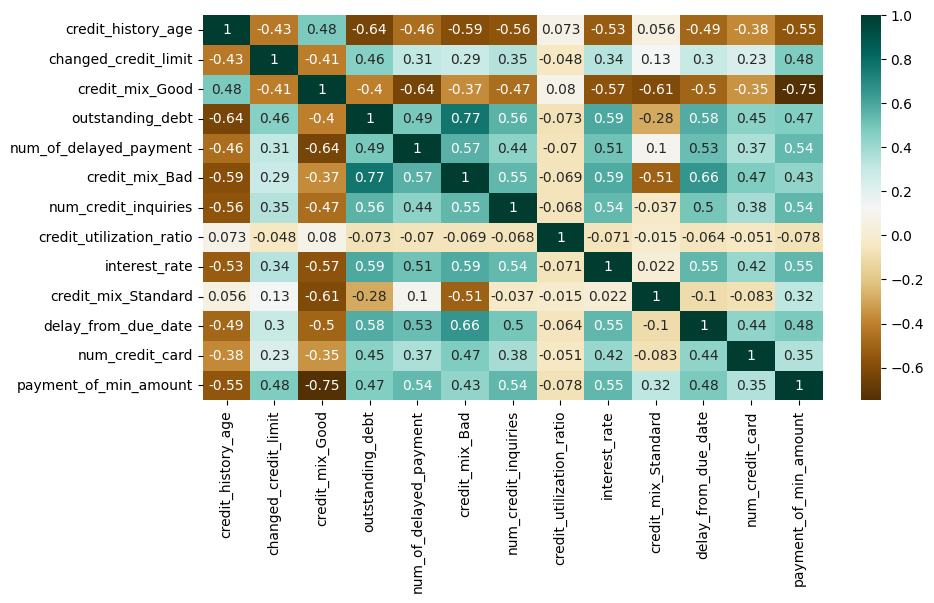

In [30]:
X_selected = df_processed[important_columns]

# finding the highly correlated matrix
correlation_matrix = X_selected.corr()
# plotting a correlation matrix graph
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, cmap="BrBG", annot=True)
plt.show()

In [31]:
# finding highly correlated feature pairs above 0.7 so they can be removed
highly_correlated = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)

print("Highly correlated pairs of variables and their correlation values: \n")
checked_pairs = set()
for col1 in X_selected.columns:
    for col2 in X_selected.columns:
        if col1 != col2 and (col1, col2) not in checked_pairs and (col2, col1) not in checked_pairs:
            if highly_correlated.loc[col1, col2]:
                correlation_value = correlation_matrix.loc[col1, col2]
                print(f"{col1} - {col2}: {correlation_value:.2f}")
                checked_pairs.add((col1, col2))

Highly correlated pairs of variables and their correlation values: 

credit_mix_Good - payment_of_min_amount: -0.75
outstanding_debt - credit_mix_Bad: 0.77


In [32]:
# removing the correlated columns
X_selected = X_selected.copy()
X_selected.drop(['credit_mix_Good', 'credit_mix_Bad'], axis = 1, inplace= True)

X_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   credit_history_age        100000 non-null  float64
 1   changed_credit_limit      100000 non-null  float64
 2   outstanding_debt          100000 non-null  float64
 3   num_of_delayed_payment    100000 non-null  float64
 4   num_credit_inquiries      100000 non-null  float64
 5   credit_utilization_ratio  100000 non-null  float64
 6   interest_rate             100000 non-null  float64
 7   credit_mix_Standard       100000 non-null  bool   
 8   delay_from_due_date       100000 non-null  float64
 9   num_credit_card           100000 non-null  float64
 10  payment_of_min_amount     100000 non-null  int64  
dtypes: bool(1), float64(9), int64(1)
memory usage: 7.7 MB


Now we add the target column to the predictor variables

In [33]:
# First we move the columns to a list
final_pred_var = X_selected.columns.tolist()
print("Final selected predictors are: ", ', '.join(final_pred_var))

Final selected predictors are:  credit_history_age, changed_credit_limit, outstanding_debt, num_of_delayed_payment, num_credit_inquiries, credit_utilization_ratio, interest_rate, credit_mix_Standard, delay_from_due_date, num_credit_card, payment_of_min_amount


In [34]:
# Then we add the target variable
final_df = df_processed[final_pred_var + ['credit_score']]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   credit_history_age        100000 non-null  float64
 1   changed_credit_limit      100000 non-null  float64
 2   outstanding_debt          100000 non-null  float64
 3   num_of_delayed_payment    100000 non-null  float64
 4   num_credit_inquiries      100000 non-null  float64
 5   credit_utilization_ratio  100000 non-null  float64
 6   interest_rate             100000 non-null  float64
 7   credit_mix_Standard       100000 non-null  bool   
 8   delay_from_due_date       100000 non-null  float64
 9   num_credit_card           100000 non-null  float64
 10  payment_of_min_amount     100000 non-null  int64  
 11  credit_score              100000 non-null  int64  
dtypes: bool(1), float64(9), int64(2)
memory usage: 8.5 MB


### Scaling the data

In [35]:
X = final_df.drop('credit_score', axis=1)
y = final_df['credit_score']

In [36]:
# normalizing the data using min-max scaler
from sklearn.preprocessing import MinMaxScaler

# initialize the min max scaler
scaler = MinMaxScaler()

# fit and transform the model
X = scaler.fit_transform(X)

## Handling imbalanced data


In [37]:
y.value_counts()

credit_score
2    53174
1    28998
3    17828
Name: count, dtype: int64

From the result of y above, we can see that we are dealing with imbalanced data.
We need to make the data balanced and we use SMOTE to solve this

In [38]:
# importing SMOTE library
from imblearn.over_sampling import SMOTE

# initializing the SMOTE
smote = SMOTE(random_state = 42)

# applying smote to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# verifying that the resampled variables are balanced
y_resampled.value_counts()

credit_score
3    53174
2    53174
1    53174
Name: count, dtype: int64

## Building the model

In [39]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, recall_score

# splitting into train sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 42)

# defining classifiers to test
classifiers = [('Random Forest', RandomForestClassifier()),
               ('Decision Tree', DecisionTreeClassifier()),
               ('Naive Bayes', GaussianNB()),
               ('Logistic Regression', LogisticRegression()),
               ('KNN', KNeighborsClassifier(n_neighbors=5))
              ]

In [40]:
# iterate over each classifier and evaluate performace
for classifier_name, clf in classifiers:
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'accuracy')
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv =5, scoring = 'precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'recall_macro').mean()
    print(f'Classifier: {classifier_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('--------------------------------------')

Classifier: Random Forest
Average Accuracy: 0.8511
Average Precision: 0.8507
Average Recall: 0.8504
--------------------------------------
Classifier: Decision Tree
Average Accuracy: 0.7713
Average Precision: 0.7699
Average Recall: 0.7708
--------------------------------------
Classifier: Naive Bayes
Average Accuracy: 0.6816
Average Precision: 0.6834
Average Recall: 0.6815
--------------------------------------
Classifier: Logistic Regression
Average Accuracy: 0.6905
Average Precision: 0.6901
Average Recall: 0.6904
--------------------------------------
Classifier: KNN
Average Accuracy: 0.7917
Average Precision: 0.7924
Average Recall: 0.7917
--------------------------------------


From the evaluation, Random Forest Classifier had the best performce

In [41]:
# using RandomForestClassifier to fit the model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluating the model

In [42]:
# making predictions on the test set
y_pred = rf_model.predict(X_test)

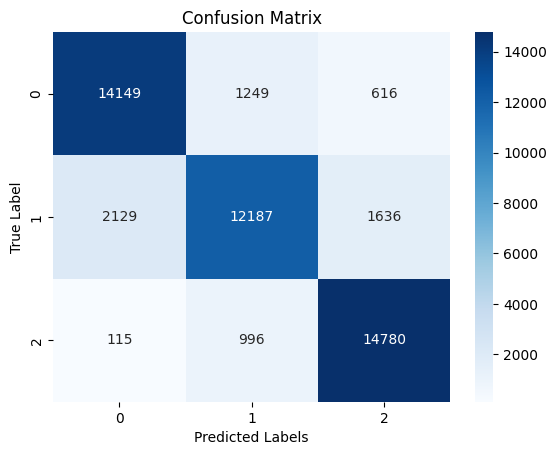

In [43]:
# using confusion matrix to evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

In [44]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.88      0.87     16014
           2       0.84      0.76      0.80     15952
           3       0.87      0.93      0.90     15891

    accuracy                           0.86     47857
   macro avg       0.86      0.86      0.86     47857
weighted avg       0.86      0.86      0.86     47857



## Deploying the Model
We apply the trained model to new data

In [45]:
val_data = pd.read_csv('test.csv', low_memory =False)

In [46]:
val_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [47]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [48]:
# creating a copy of the validation dataset
new_df = val_data.copy()

# converting the column names to lowercase for better recall like we did in the train data
new_df.columns = new_df.columns.str.lower()

# strip unwanted characters, replace unwanted values, impute missing values, and change data types
def preprocess_new_data(data):
    preprocess_data(data, column='name', mvi_groupby='customer_id')
    preprocess_data(data, column='type_of_loan', mvi_customval='not specified')
    preprocess_data(data, column='ssn', unwanted_value_replace='#F%$D@*&8', mvi_groupby='customer_id')
    preprocess_data(data, column='occupation', unwanted_value_replace='_______', mvi_groupby='customer_id')
    preprocess_data(data, column='credit_mix', unwanted_value_replace='_', mvi_groupby='customer_id')
    preprocess_data(data, column='payment_behaviour', unwanted_value_replace='!@9#%8', mvi_groupby='customer_id')
    preprocess_data(data, column='monthly_inhand_salary', mvi_groupby='customer_id')
    preprocess_data(data, column='num_credit_inquiries', mvi_groupby='customer_id')
    preprocess_data(data, column='age', unwanted_value_strip='_', mvi_groupby='customer_id', datatype='int')
    preprocess_data(data, column='annual_income', unwanted_value_strip='_', mvi_groupby='customer_id', datatype='float')
    preprocess_data(data, column='outstanding_debt', unwanted_value_strip='_', mvi_groupby='customer_id', datatype='float')
    preprocess_data(data, column='amount_invested_monthly', unwanted_value_strip='_', mvi_groupby='customer_id', datatype='float')
    preprocess_data(data, column='num_of_loan', unwanted_value_strip='_', mvi_groupby='customer_id', datatype='int')
    preprocess_data(data, column='num_of_delayed_payment', unwanted_value_strip='_', mvi_groupby='customer_id', datatype='float')
    preprocess_data(data, column='changed_credit_limit', unwanted_value_strip='_', unwanted_value_replace='_', mvi_groupby='customer_id', datatype='float')
    preprocess_data(data, column='monthly_balance', unwanted_value_strip='_', unwanted_value_replace='__-333333333333333333333333333__', mvi_groupby='customer_id', datatype='float')
    data['credit_history_age'] = data['credit_history_age'].apply(lambda x: credit_hist_in_months(x)).astype(float)
    preprocess_data(data, column='credit_history_age', mvi_groupby='customer_id')
    
    return data


# preprocess the new data
new_df = preprocess_new_data(new_df)


Missing values imputed with group mode

Missing values are replaced with 'not specified'

Unwanted value #F%$D@*&8 is replaced with NaN

Missing values imputed with group mode

Unwanted value _______ is replaced with NaN

Missing values imputed with group mode

Unwanted value _ is replaced with NaN

Missing values imputed with group mode

Unwanted value !@9#%8 is replaced with NaN

Missing values imputed with group mode

Missing values imputed with group mode

Missing values imputed with group mode

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of age is changed to int

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of annual_income is changed to float

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of outstanding_debt is changed to float

Trailing & leading _ are removed

Missing values imputed with group mode

Datatype of amount_invested_monthly is changed to float

Trailing 

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        50000 non-null  object 
 1   customer_id               50000 non-null  object 
 2   month                     50000 non-null  object 
 3   name                      49996 non-null  object 
 4   age                       50000 non-null  int32  
 5   ssn                       50000 non-null  object 
 6   occupation                50000 non-null  object 
 7   annual_income             50000 non-null  float64
 8   monthly_inhand_salary     49972 non-null  float64
 9   num_bank_accounts         50000 non-null  int64  
 10  num_credit_card           50000 non-null  int64  
 11  interest_rate             50000 non-null  int64  
 12  num_of_loan               50000 non-null  int32  
 13  type_of_loan              50000 non-null  object 
 14  delay_

In [50]:
# drop rows with missing values
new_df.dropna(inplace=True)

# applying the outlier capping function to the test set
new_df_clean, new_outliers = outlier_capping(new_df)

# encoding the test dataset
new_df_clean['month'] = pd.to_datetime(new_df_clean.month, format='%B').dt.month

# label encoding ordinal columns
new_df_clean['type_of_loan'] = label_encoder.fit_transform(new_df_clean['type_of_loan'])

new_target_mapping = {'No': 1, 'NM': 2, 'Yes': 3}
new_df_clean['payment_of_min_amount'] = new_df_clean['payment_of_min_amount'].map(new_target_mapping)

# one-hot encode necessary columns
new_columns_to_encode = ['occupation', 'credit_mix', 'payment_behaviour']
# create dummy variables
df_dummy_new = pd.get_dummies(new_df_clean[new_columns_to_encode])
# concatenating the dummy variables with the original dataftrame
new_df_clean = pd.concat([new_df_clean, df_dummy_new], axis=1)

# dropping the original categorical columns
new_df_clean.drop(new_columns_to_encode, axis=1, inplace=True)

# drop irrelevant columns
new_df_clean.drop(['id', 'customer_id', 'ssn', 'name'], axis=1, inplace=True)

# drop columns identified with multicollinearity
new_df_clean.drop(['credit_mix_Good', 'credit_mix_Bad'], axis=1, inplace=True)

# select only the important columns
final_val_df = new_df_clean[final_pred_var]

# normalize the new data using min max scaler
final_val_df = scaler.transform(final_val_df)

# making predictions using the model
predictions = rf_model.predict(final_val_df)

# appending the predictions to the original dataset
new_df['credit_score'] = pd.Series(predictions)

new_df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,273.0,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,3.0
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,3.0
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.811894,273.0,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446,3.0
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,32.430559,276.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873,3.0
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,3.0


## Conclusion
This notebook walks through the process of building a credit scoring model, from data exploration to deployment. We used various techniques to preprocess the data, handle imbalances, and evaluate different models to find the best one for predicting credit scores.